In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/tejas/OneDrive/Desktop/Python project/cab_rides.csv")

In [3]:
df      #whole data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


# 10 Questions on Uber vs Lyft Analytical Project

# Q1

<AxesSubplot:>

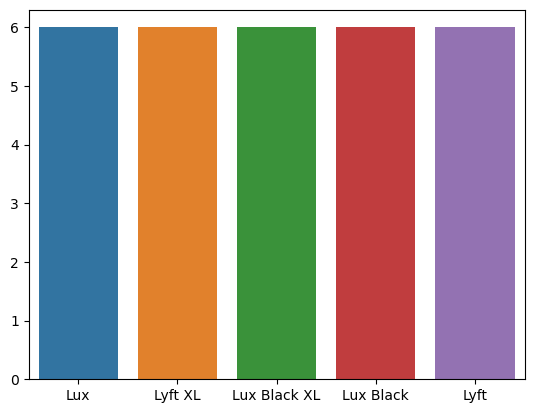

In [4]:
# I want those Trips who choose distance > 5km 
# and that time surge price is >= 2.0 and which cars is haivng those trips

df1 = df[df["distance"]>5.0]
df2 = df1[df1["surge_multiplier"]>=2.0]
df3 = df2["name"].value_counts()
sns.barplot(df3.index,df3.values)

# Observation

These cars which is (Lux, Lyft Xl, Lux Black Xl, Lux Black, Lyft) having a trips when surge price is greater than equals to 2.0 and trips distance is greater than 5km

# Q2

In [5]:
# Display the data if source="west end" and destination="fenway" count is same to source="Fenway" and destination

df1=df.loc[(df.source=="West End")&(df.destination=="Fenway")].shape
df2=df.loc[(df.source=="Fenway")&(df.destination=="West End")].shape
df1,df2

((10165, 10), (10165, 10))

# Observation

From source West End and destination Fenway is having same count
of source Fenway and destination West End {# It is not possible with real data but in this condition it is true}

# Q3

<AxesSubplot:>

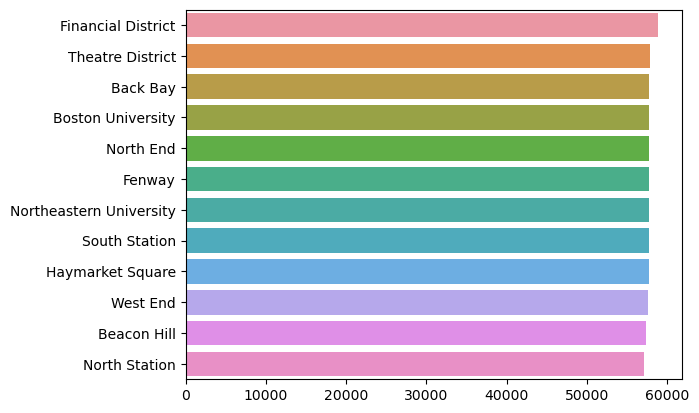

In [6]:
# display maximum number of people is taking cab from Which source

df1=df["source"].value_counts()
sns.barplot(df1.values,df1.index)

# Observation

Financial District is a point where maximum cab had taken 

# Q4

In [7]:
# display max trips from particular source to destination

a=df.groupby("source")["destination"].value_counts().sort_values(ascending=False)
a

source              destination       
Financial District  South Station         10352
South Station       Financial District    10352
Back Bay            North End             10225
North End           Back Bay              10225
West End            Fenway                10165
                                          ...  
                    North End              9206
                    Haymarket Square       9156
Haymarket Square    West End               9156
South Station       North Station          9153
North Station       South Station          9146
Name: destination, Length: 72, dtype: int64

# Observation

Source which is Financial District and 
Destination which is South Station 
having a maximum number of trips 

# Q5

([<matplotlib.patches.Wedge at 0x21040a2e7c0>,
 [Text(6.735557395310444e-17, 1.1, 'Lyft XL'),
  Text(-2.0206672185931328e-16, -1.1, 'Lyft')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-1.1021821192326178e-16, -0.6, '50.00%')])

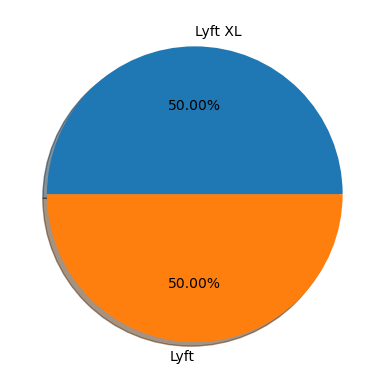

In [8]:
# which of the car has taken the max trips when surge price > 2

data=df[df["surge_multiplier"]>2.0]
df1=data["name"].value_counts()
df1
label = df1.index
size = df1.values
plt.pie(size,labels=label,autopct="%0.2f%%",shadow=True)

# Observation 

Lyft XL and Lyft these 2 cars had made maximum trips
while surge price is greater than 2

# Q6

([<matplotlib.patches.Wedge at 0x21040b0b640>,
 [Text(-0.3644266436748164, 1.0378791940201464, 'Uber'),
  Text(0.3644266436748166, -1.0378791940201462, 'Lyft')],
 [Text(-0.1987781692771726, 0.5661159240109889, '60.75%'),
  Text(0.19877816927717265, -0.5661159240109888, '39.25%')])

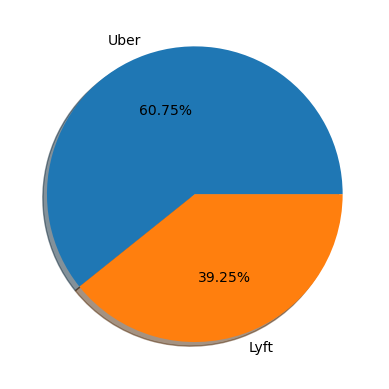

In [9]:
# In the range between 2 to 3km which cab type had made the highest trips with shared and non shared

data=df[(df.distance>2.0)&(df.distance<3.0)&(df.name!="Shared")]
without_shared = data["cab_type"].value_counts()

label = without_shared.index
size = without_shared.values
plt.pie(size,labels=label,autopct="%0.2f%%",shadow=True)

([<matplotlib.patches.Wedge at 0x21040b5ba90>],
 [Text(-1.1, 1.3471114790620887e-16, 'Lyft')],
 [Text(-0.6, 7.347880794884119e-17, '100.00%')])

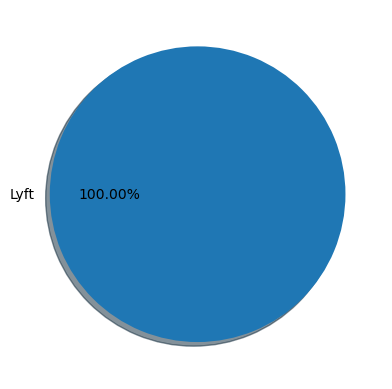

In [10]:
data=df[(df.distance>2.0)&(df.distance<3.0)&(df.name=="Shared")]
with_shared = data["cab_type"].value_counts()

label = with_shared.index
size = with_shared.values
plt.pie(size,labels=label,autopct="%0.2f%%",shadow=True)

# Observations

In the range of 2 to 3kms without shared taxi 
Uber made 60.75% of trips and lyft made only 39.25% of trips 

And in 2nd chart we can clearly see that with shared taxi
only lyft made all the trips 

# Q7

In [11]:
# how much profit we got from surge part which is greater than 1

a = df[df["surge_multiplier"]>1.0]
b = a.price.sum()
a.shape[0],b
fin = b-(b/a.shape[0])
fin

583852.1630512514

# Observation

From surge part we made 583852.16 profit 

In [12]:
df['date_time'] = pd.to_datetime(df['time_stamp']/1000, unit='s')
df
# df['date']=pd.to_datetime(df['date_time']).dt.date
# df['time']=pd.to_datetime(df['date_time']).dt.time
# df["weekdays"]=df["date_time"].dt.day_name()
# df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999872
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999872
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.533999872
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999872


# Q8 

([<matplotlib.patches.Wedge at 0x21040bb95b0>,
 [Text(1.0635826447442782, 0.28069905200902684, 'UberXL'),
  Text(0.7901409130671293, 0.7652955883169871, 'Black'),
  Text(0.32191388900260715, 1.0518419311223608, 'UberX'),
  Text(-0.22388717022419372, 1.0769747141920294, 'UberPool'),
  Text(-0.7139005313225794, 0.8368667942852908, 'WAV'),
  Text(-1.0278319799547535, 0.39186913757310804, 'Taxi'),
  Text(-1.090258522256517, -0.14606969106229892, 'Black SUV'),
  Text(-0.8988402178075536, -0.6341027226338567, 'Lux'),
  Text(-0.5171663810755597, -0.9708444439173607, 'Lux Black XL'),
  Text(-0.02637113593340735, -1.0996838469258252, 'Lux Black'),
  Text(0.465887920839214, -0.9964679850432298, 'Shared'),
  Text(0.8569767633209167, -0.6896309354488135, 'Lyft'),
  Text(1.0721670807542847, -0.2458815791124566, 'Lyft XL')],
 [Text(0.5801359880423336, 0.15310857382310553, '8.21%'),
  Text(0.43098595258207045, 0.4174339572638111, '8.06%'),
  Text(0.17558939400142207, 0.5737319624303786, '7.99%'),
  T

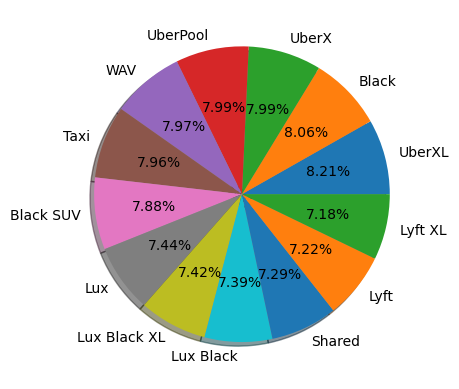

In [13]:
# How much trips is there in the 2nd week of christmas month

df1 =df[(df.date_time>"2018-12-08")&(df.date_time<"2018-12-14")]
df2 = df1["name"].value_counts()

label = df2.index
size = df2.values
plt.pie(size,labels=label,autopct="%0.2f%%",shadow=True)

# Observation

In the 2nd week of christmas month all cars almost having 7% trips
Except Black car which had done maximum trips with 8%

<AxesSubplot:ylabel='name'>

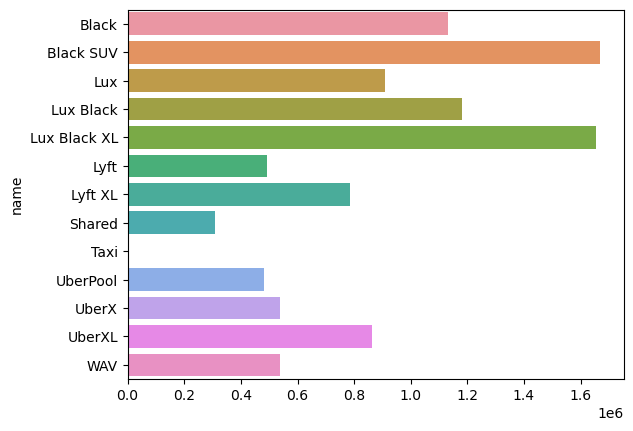

In [14]:
# Calculate total money earned per cab
df1 = df.groupby("name")["price"].sum()
sns.barplot(df1.values,df1.index)

In [16]:
# Change date to int for rounding time to the hour

df['date_time'] = pd.to_datetime(df['date_time'])
df['Date'] = df['date_time'].dt.strftime('%d/%m/%Y')
df['Time'] = df['date_time'].dt.strftime('%H:%M')
df['Time']  = df['Time'].str.replace(":","")
df['Time'] = df['Time'].astype(int)
df['Time'] = df.Time.round(decimals=-2)
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,Date,Time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,16/12/2018,900
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,27/11/2018,200
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,28/11/2018,100
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,30/11/2018,500
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,29/11/2018,300


# Q9

<AxesSubplot:>

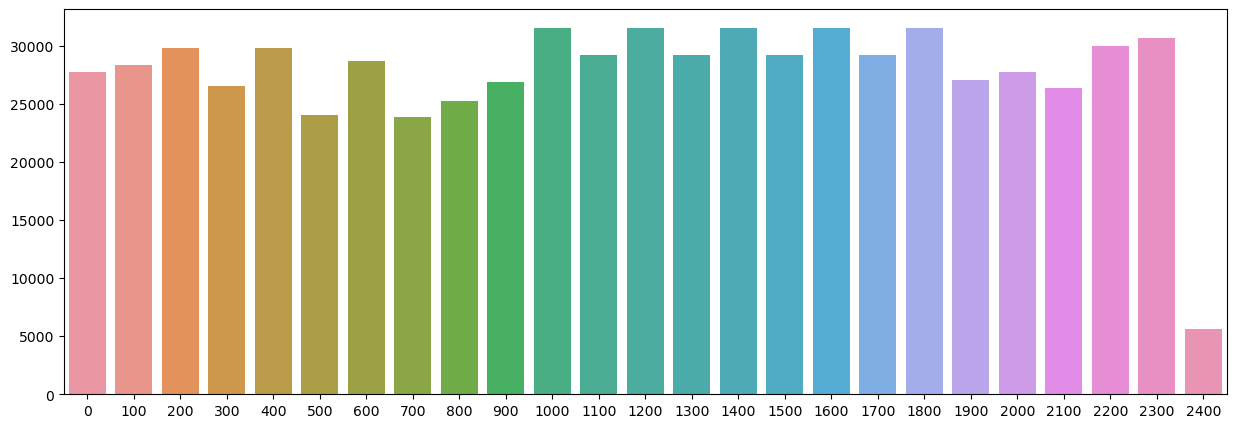

In [17]:
# # Most popular time to take cabs

df1 = df["Time"].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(df1.index,df1.values)

# Q10

([<matplotlib.patches.Wedge at 0x2104b0a4640>,
 [Text(0.9526279355804298, 0.5500000148652441, '(3.0, 300)'),
  Text(-5.149471629032507e-08, 1.0999999999999988, '(3.0, 1200)'),
  Text(-0.9526279870751434, 0.5499999256737774, '(3.0, 1400)'),
  Text(-0.952627884085708, -0.5500001040567056, '(3.0, 1700)'),
  Text(-0.28470080868255343, -1.0625184466801036, '(3.0, 400)'),
  Text(0.284701107123012, -1.0625183667132212, '(3.0, 900)'),
  Text(0.7778175867481129, -0.777817331862271, '(3.0, 2200)'),
  Text(1.0625184600079092, -0.2847007589424754, '(3.0, 2300)')],
 [Text(0.5196152375893253, 0.30000000810831495, '16.67%'),
  Text(-2.8088027067450036e-08, 0.5999999999999993, '16.67%'),
  Text(-0.5196152656773508, 0.299999959458424, '16.67%'),
  Text(-0.5196152095012951, -0.30000005675820307, '16.67%'),
  Text(-0.15529135019048365, -0.5795555163709656, '8.33%'),
  Text(0.15529151297618835, -0.5795554727526661, '8.33%'),
  Text(0.4242641382262433, -0.4242639991976023, '8.33%'),
  Text(0.57955552364067

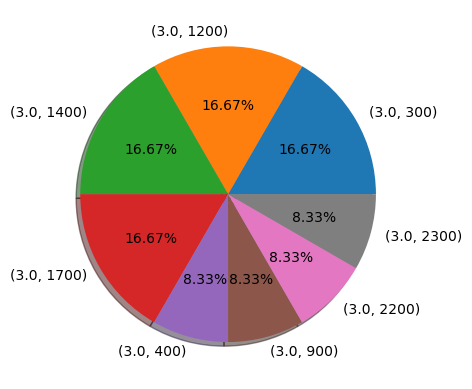

In [42]:
# On what time we got highest surge_multiplier

df1=df[df["surge_multiplier"]>2.5]
df2 = df1.groupby("surge_multiplier")["Time"].value_counts().sort_values(ascending=False)
df2
label = df2.index
size = df2.values
plt.pie(size,labels=label,autopct="%0.2f%%",shadow=True)

# Observation

There are 4 times which is 300,1200,1400,1700 on these time surge_mulitiplier was highest and 
16.67% rides is done